# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)
Training Set:   39209 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = y_train.max() + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

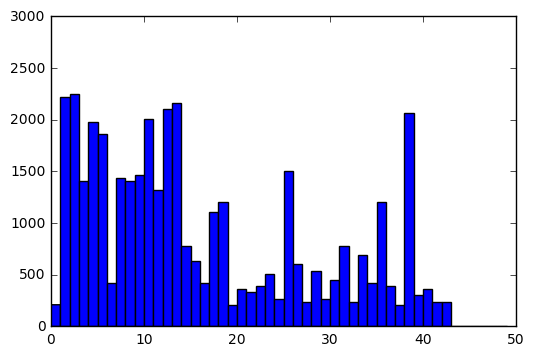

38


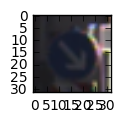

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import collections

# Visualizations will be shown in the notebook.
%matplotlib inline

# Plot class distribution
hist_data = np.histogram(y_train,bins=range(44))

plt.hist(y_train,bins=range(50),color='#0000FF')
plt.axis([0,50,0,3000])
plt.show()

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 15
BATCH_SIZE = 128

X_train, y_train = shuffle(X_train, y_train)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=43)

# One hot encoding via LabelBinarizer
# lb = preprocessing.LabelBinarizer()
# y_train = lb.fit_transform(y_train)
# y_test = lb.fit_transform(y_test)

def LeNet(x):
     # Hyperparameters
    mu = 0
    sigma = 0.1    
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    conv1 = tf.nn.relu(conv1)
    
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    conv2 = tf.nn.relu(conv2)

    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    fc0   = flatten(conv2)
    
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    fc1    = tf.nn.relu(fc1)

    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    fc2    = tf.nn.relu(fc2)

    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [5]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [6]:
# Training pipeline
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [7]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [8]:
# Running the model
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.565

EPOCH 2 ...
Validation Accuracy = 0.762

EPOCH 3 ...
Validation Accuracy = 0.841

EPOCH 4 ...
Validation Accuracy = 0.874

EPOCH 5 ...
Validation Accuracy = 0.893

EPOCH 6 ...
Validation Accuracy = 0.908

EPOCH 7 ...
Validation Accuracy = 0.934

EPOCH 8 ...
Validation Accuracy = 0.926

EPOCH 9 ...
Validation Accuracy = 0.913

EPOCH 10 ...
Validation Accuracy = 0.931

EPOCH 11 ...
Validation Accuracy = 0.943

EPOCH 12 ...
Validation Accuracy = 0.946

EPOCH 13 ...
Validation Accuracy = 0.955

EPOCH 14 ...
Validation Accuracy = 0.950

EPOCH 15 ...
Validation Accuracy = 0.940

Model saved


In [9]:
# Lets test our model:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.860


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I have split the images into a validation and training set, with the training 
set being set to 20% as recommended in the udacity videos. I have decided to keep the images as RGB format since the research 
paper shared with me through feedback: https://arxiv.org/pdf/1606.02228v2.pdf , 
indicated the benefit of considering color in my model.
    
However my accuracy dropped to 0.05 and such when I normalized the data not sure why

I have tried using LabelBinarizer to one hot encode the data, however ran into a lot of issues in my model. Do you have some recommendations or examples to look at? I basically one hot encoded the y_train and y_label and wanted to pass y directly into the model

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
I haven't generated additional data , however I have split training data into training and validation data at 20%. 
I have then used testing data to evaluate my model and so far stand at 86%.

It seems from the question there is a possibility to generate more data. How and what would that data look like?

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I followed the LeNet5 architecture where we have two convolutional layers and three fully connected layers
After each convolutional layer we use a relu activation function and max pooling.

The LeNet model accepts images of 32*32*C , and fortunately for us the images are alread of 32 height and width

The two convolutional layers patch sizes are 5 * 5, and after the initial convolution the network depth increases
from 3 to 6

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**ANSWER :** I have used an adam optimizer since in the course of the lectures David mentioned that the adam optimizer is more 
sophisticated than the stochastic gradient descent.

We used a learning rate of 0.001, I tried experimenting with higher learning rates and got bad accuracy results

I have also used 128 for my batch size, which has been really great to work on my machine. I have kept the number of epocs to 10, as I have been able to get good accuracy with only 10 epochs.

** REVISED :** 
I have changed the number of epochs from 10 to 15 and the accuracy percentages have oscillated between increasing and decreasing
I have also experimented with having some dropouts however the performance of my model have decresed rapidly, so removed using dropouts from my model

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**ANSWER :**
I have tried after reading the paper associated with the project to convert my images from RGB to YUV, however 
the skimage.color rgb2yuv function seemed to not be imported successfully. I played with viewing the images as grey scale and got pretty poor accuracy levels. If I had more time, I would have liked to experiment with brightness and increasing the images contrast.

I added a dropout layer after the first convolution layer with 0.5, and got a pretty bad accuracy rate as well.

I have also tried normalizing the data to be betwee -0.5 and 0.5, and got poor accuracy there as well, however after getting feedback decided to keep the images as RGB

I have stopped using tensorflow's one_hot function and instead using LabelBinarizer to one hot encode my data. My model's accuracy seems to have dropped a little. Not sure if thats simply a coincidence 

I have implemented the LeNet architecture based on the lab we had, and had to tweak the number of labels or classes expected
and the input color channels depth

I think the LeNet architecture is a really good network for the problem, however I would have liked to tweak it a bit more and definitely dropout didn't do the trick

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [10]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from PIL import Image
from scipy import ndimage, misc

imgs = ['stop-sign.png', 'noentry.png', 'peds.png', 'work-ahead.png', 'yield.png']

new_images = []

for imgname in imgs:
    image = ndimage.imread(imgname, mode="RGB")
    image_resized = misc.imresize(image, (32, 32))
    new_images.append(image_resized)

print(len(new_images))
print('New Images loaded successfully!!')

5
New Images loaded successfully!!


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



Index:  0
Shape:  (32, 32, 3)
Index:  1
Shape:  (32, 32, 3)
Index:  2
Shape:  (32, 32, 3)
Index:  3
Shape:  (32, 32, 3)
Index:  4
Shape:  (32, 32, 3)


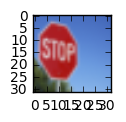

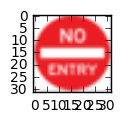

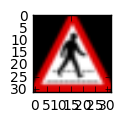

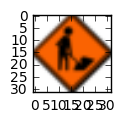

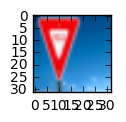

In [11]:
# new_index = random.randint(0, len(new_images))
# image = new_images[new_index].squeeze() 
# plt.figure(figsize=(1,1))
# plt.imshow(image)
# print(image.shape)

for index, image in enumerate(new_images):
    print('Index: ', index)
    print('Shape: ', image.shape)
    plt.figure(figsize=(1,1))
    plt.imshow(image)

The images where originally of a variety of shapes and sizes, and now with the resized images some of them look 
a little morphed or squeezed, which makes their features a little difficult to detect

In [12]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
#new_images_predictions = sess.run(correct_prediction, feed_dict={x: new_images})
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('./lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('.'))
    classification = sess.run(tf.argmax(logits, 1), feed_dict={x: new_images})
    print(classification)

[ 1 17 25  2 30]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


Based on the probabilities yielded , it seems the model predicted the stop sign and No entry correctly, however missed for yield, pedestrian crossing. For road work ahead, I am not sure if the model missed it or renamed it as General Caution.
The model have prediction two of five images, so it's 40% accurate.

In [13]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
print(classification)

signnames_classifications = []
import csv
with open('./signnames.csv', 'r') as csvfile:
    signnamesreader = csv.reader(csvfile)
    for row in signnamesreader:
        signnames_classifications.append(row[1])
    signnames_classifications = signnames_classifications[1:]
    
    for index, value in enumerate(classification):
        print(signnames_classifications[value])
        

[ 1 17 25  2 30]
Speed limit (30km/h)
No entry
Road work
Speed limit (50km/h)
Beware of ice/snow


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

TopKV2(values=array([30, 25, 17,  2,  1]), indices=array([4, 2, 1, 3, 0], dtype=int32))


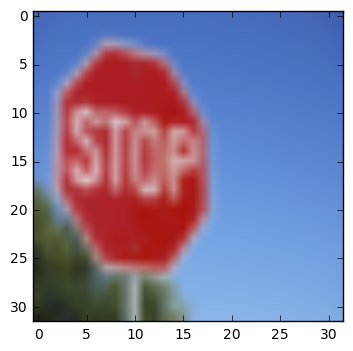

30
Beware of ice/snow


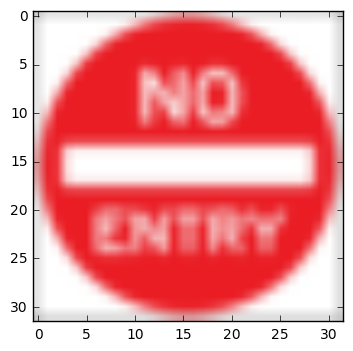

25
Road work


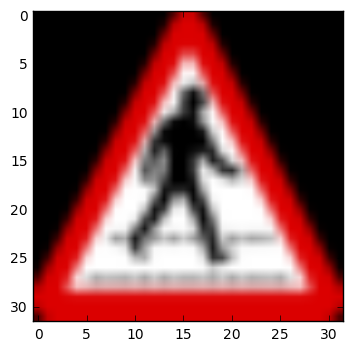

17
No entry


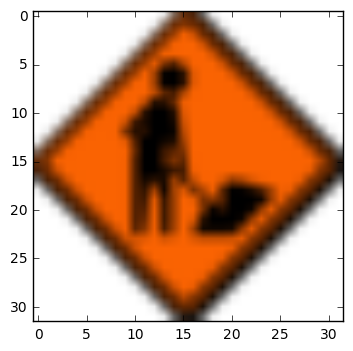

2
Speed limit (50km/h)


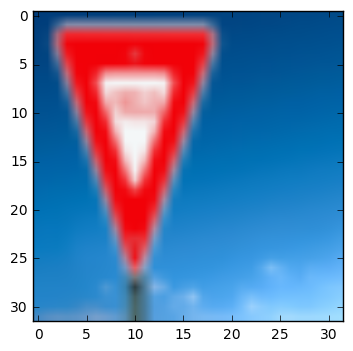

1
Speed limit (30km/h)


In [14]:
# running top k predictions
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('./lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('.'))
    classification = sess.run(tf.argmax(logits, 1), feed_dict={x: new_images})
    new_predictions = sess.run(tf.nn.top_k(classification, k=5))
    print(new_predictions)
    for index, value in enumerate(new_predictions[0]):
        plt.imshow(new_images[index])
        plt.show()
        print(value)
        print(signnames_classifications[value])
        

**ANSWER : ** 
It seems that the three largest probabilities are 40, 18 and 17. This means the highest probility we have reached thus far is 40%

Indicies of top predictions:  [[ 1 12 14 29 25]
 [17  1  0 25 24]
 [25 10  9 20  2]
 [ 2  1  7 10 17]
 [30 20 41 18 28]]
Values of those predictions:  [[  9.99255121e-01   5.15293272e-04   1.50946478e-04   5.35625259e-05
    1.92700263e-05]
 [  7.45191038e-01   2.54803807e-01   5.11079270e-06   5.02963253e-12
    4.69017178e-16]
 [  1.00000000e+00   7.59134006e-11   4.59895607e-15   1.56228853e-15
    4.65593471e-16]
 [  9.84128714e-01   6.87722815e-03   5.17404312e-03   3.75464908e-03
    6.51529699e-05]
 [  9.69121039e-01   2.45854352e-02   4.87536145e-03   9.31598130e-04
    3.76525335e-04]]

Index:  [ 1 12 14 29 25]
Prediction Probabilities:  [  9.99255121e-01   5.15293272e-04   1.50946478e-04   5.35625259e-05
   1.92700263e-05]



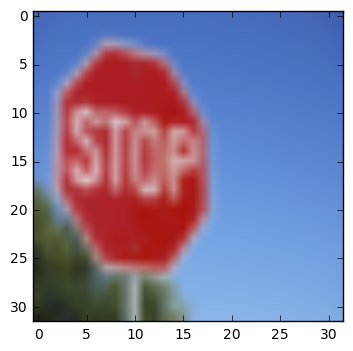

Index :  1
Sign Name:  Speed limit (30km/h)
Probability:  0.999255


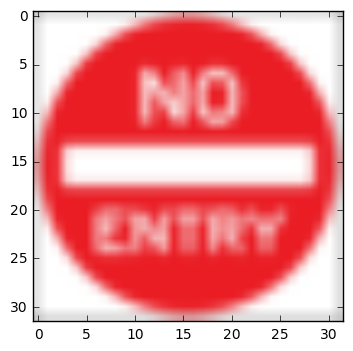

Index :  12
Sign Name:  Priority road
Probability:  0.000515293


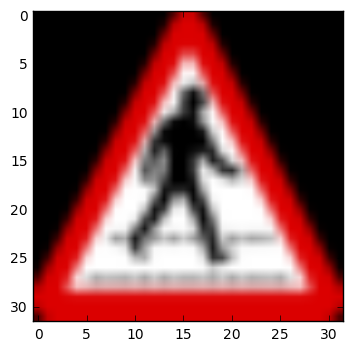

Index :  14
Sign Name:  Stop
Probability:  0.000150946


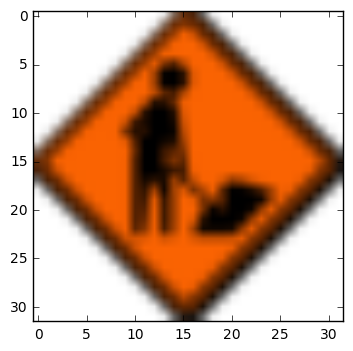

Index :  29
Sign Name:  Bicycles crossing
Probability:  5.35625e-05


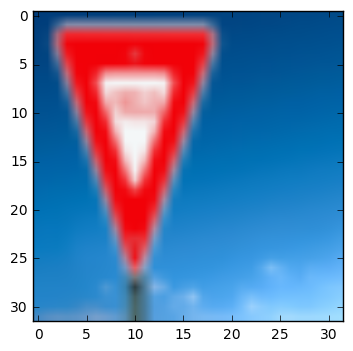

Index :  25
Sign Name:  Road work
Probability:  1.927e-05
Index:  [17  1  0 25 24]
Prediction Probabilities:  [  7.45191038e-01   2.54803807e-01   5.11079270e-06   5.02963253e-12
   4.69017178e-16]



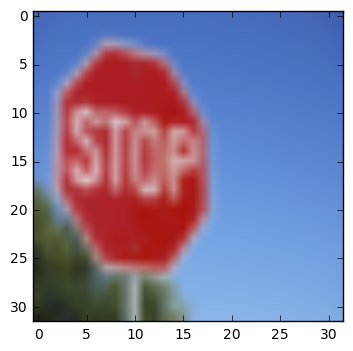

Index :  17
Sign Name:  No entry
Probability:  0.745191


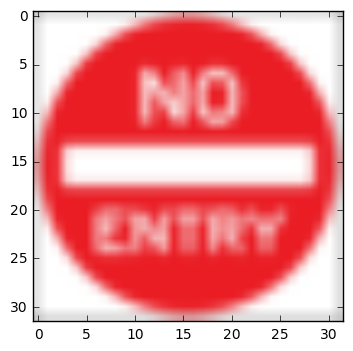

Index :  1
Sign Name:  Speed limit (30km/h)
Probability:  0.254804


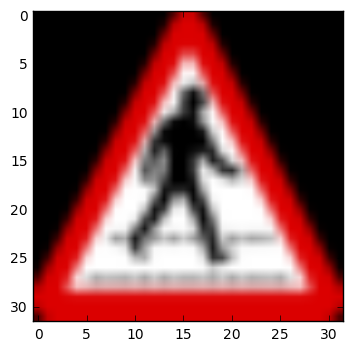

Index :  0
Sign Name:  Speed limit (20km/h)
Probability:  5.11079e-06


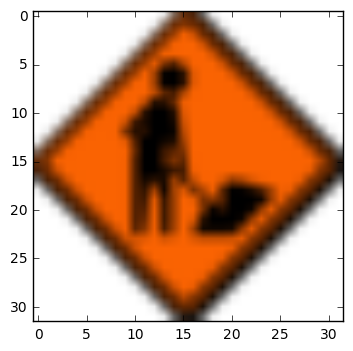

Index :  25
Sign Name:  Road work
Probability:  5.02963e-12


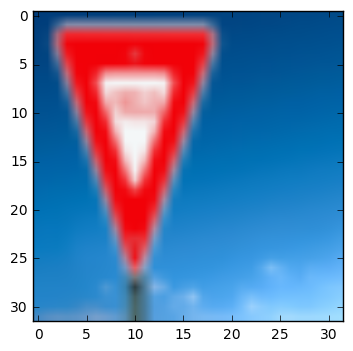

Index :  24
Sign Name:  Road narrows on the right
Probability:  4.69017e-16
Index:  [25 10  9 20  2]
Prediction Probabilities:  [  1.00000000e+00   7.59134006e-11   4.59895607e-15   1.56228853e-15
   4.65593471e-16]



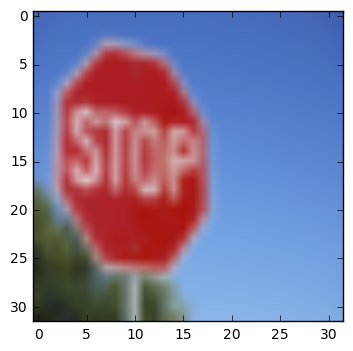

Index :  25
Sign Name:  Road work
Probability:  1.0


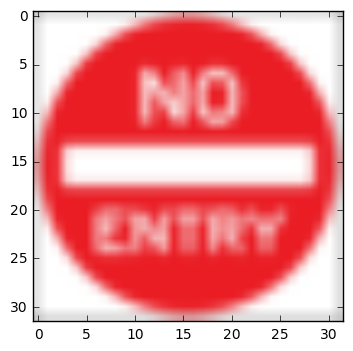

Index :  10
Sign Name:  No passing for vehicles over 3.5 metric tons
Probability:  7.59134e-11


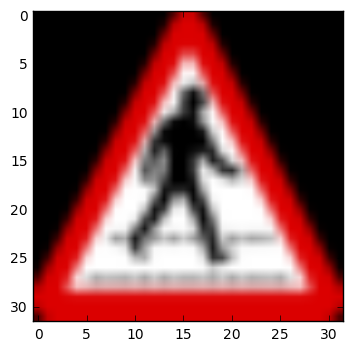

Index :  9
Sign Name:  No passing
Probability:  4.59896e-15


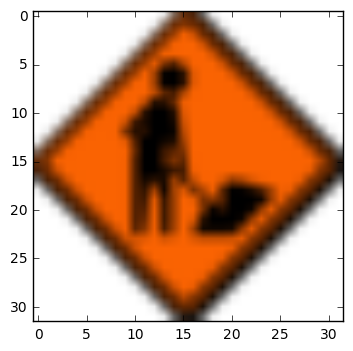

Index :  20
Sign Name:  Dangerous curve to the right
Probability:  1.56229e-15


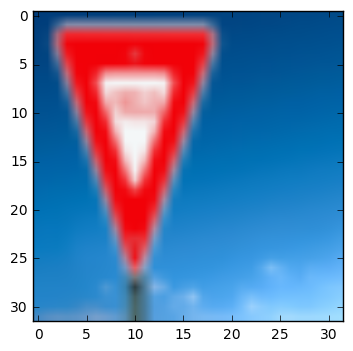

Index :  2
Sign Name:  Speed limit (50km/h)
Probability:  4.65593e-16
Index:  [ 2  1  7 10 17]
Prediction Probabilities:  [  9.84128714e-01   6.87722815e-03   5.17404312e-03   3.75464908e-03
   6.51529699e-05]



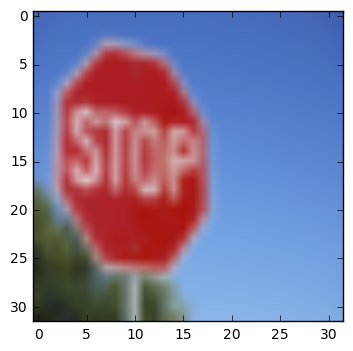

Index :  2
Sign Name:  Speed limit (50km/h)
Probability:  0.984129


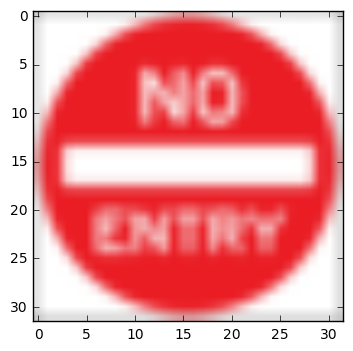

Index :  1
Sign Name:  Speed limit (30km/h)
Probability:  0.00687723


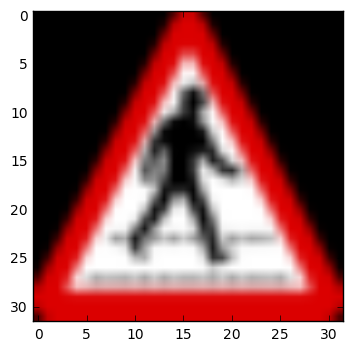

Index :  7
Sign Name:  Speed limit (100km/h)
Probability:  0.00517404


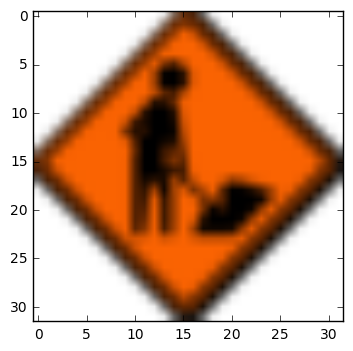

Index :  10
Sign Name:  No passing for vehicles over 3.5 metric tons
Probability:  0.00375465


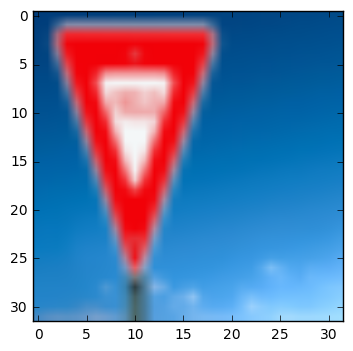

Index :  17
Sign Name:  No entry
Probability:  6.5153e-05
Index:  [30 20 41 18 28]
Prediction Probabilities:  [  9.69121039e-01   2.45854352e-02   4.87536145e-03   9.31598130e-04
   3.76525335e-04]



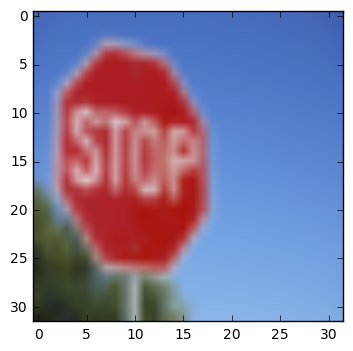

Index :  30
Sign Name:  Beware of ice/snow
Probability:  0.969121


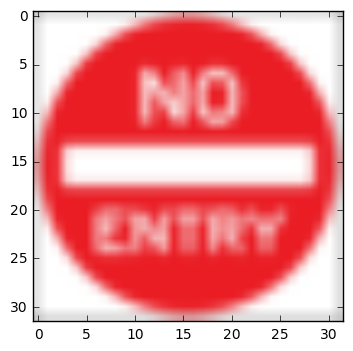

Index :  20
Sign Name:  Dangerous curve to the right
Probability:  0.0245854


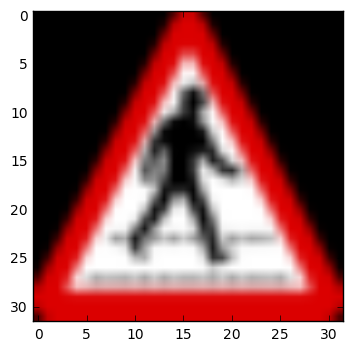

Index :  41
Sign Name:  End of no passing
Probability:  0.00487536


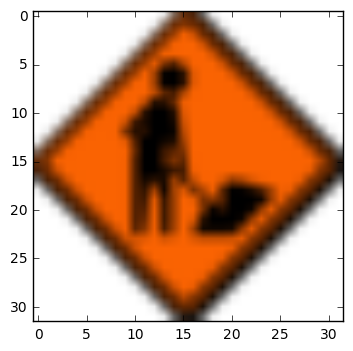

Index :  18
Sign Name:  General caution
Probability:  0.000931598


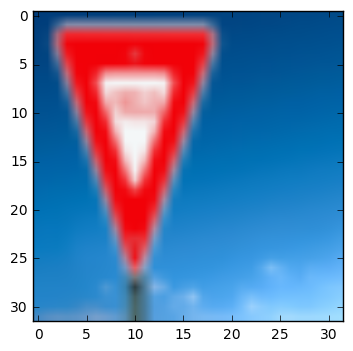

Index :  28
Sign Name:  Children crossing
Probability:  0.000376525


In [26]:
from scipy import stats
import matplotlib.pyplot as plt

# Lets visualize the softmax topk probabilities:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('./lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('.'))
    top_k_preds = sess.run(tf.nn.top_k(tf.nn.softmax(logits) , k=5), feed_dict={x: new_images})
    print('Indicies of top predictions: ', top_k_preds.indices)
    print('Values of those predictions: ', top_k_preds.values)
    print()
    
    for ind, value in enumerate(top_k_preds.indices):
        print('Index: ', value)
        print('Prediction Probabilities: ', top_k_preds.values[ind])
        print()
        for i, value in enumerate(value):
            plt.imshow(new_images[i])
            plt.show()
            print('Index : ', value)
            print('Sign Name: ', signnames_classifications[value])
            print('Probability: ', top_k_preds.values[ind][i])

**ANSWER:** My model seems quite unconfiendent with its results, and while visualizing the images the results aren't making total sense. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.